## <strong>Prática 1: Como adquirir e visualizar dados de Temperatura da Superfície do Mar usando Python</strong>

In [1]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Programa para ler arquivo de TSM do satélite AQUA/MODIS em netCDF  %
# By Geraldo, Rafael e Victor                                        %
# Fortaleza, 13 de novembro de 2023                                  %
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

<p style="text-align: justify;">Ao final desta prática é esperado que o estudante seja capaz de realizar as seguintes atividades:

- Adquirir dados de Temperatura da Superfície do Mar oriundos de observações de satélites, disponíveis na internet;
- Visualizar os dados anteriormente adquiridos utilizando Python;
- Observar valores máximos e minimos de TSM da região de estudo;
- Plotar um mapa gráfico de TSM da região de estudo.

## Etapa 1: Aquisição dos dados de TSM utilizando a plataforma ERDDAP
<hr />




<p style="text-align: justify;">No presente momento, existem diversas fontes de dados de Temperatura da Superfície do Mar (TSM) disponíveis gratuitamente. Os tipos de dados de TSM podem ser amplamente caracterizados como observações pontuais, perfis de profundidade, <strong>estimativas usando sensoriamento remoto</strong>, resultados de modelos númericos e produtos de análise. Nesta prática nós utilizaremos a plataforma de dados ERDDAP, mantida pela NOAA/Coastwatch, como principal fonte de dados de TSM. A imagem abaixo mostra a página inicial da plataforma, conforme visitada no dia 07/11/2023:</p>

![Página Inicial do Ocean Color](https://raw.githubusercontent.com/rdviana/tutorials-python/4ff0ac46dc96b0d604d873e6dd5e5490f52dfea4/assets/eollab/lessons/fig01_oceancolor.png)





### <i>Pesquisando os dados de TSM</i>

Para acessar os dados disponíveis na plataforma é necessário clicar na barra suspensa no item **Data**, em seguida clicar na opção **Find Data**. Isto irá direcionar para a página abaixo:

<br>

![Pesquisa de Dados](https://raw.githubusercontent.com/rdviana/tutorials-python/4ff0ac46dc96b0d604d873e6dd5e5490f52dfea4/assets/eollab/lessons/fig03_level3_4.png)

<br>

Nessa janela, você deve clicar na opção **Level 3 & 4 Browser**, seguindo para a página seguinte:

<br>

![Produtos L3 & L4](https://raw.githubusercontent.com/rdviana/tutorials-python/4ff0ac46dc96b0d604d873e6dd5e5490f52dfea4/assets/eollab/lessons/fig02_find_data.png)

<br>

Finalmente ao clicar no botão azul **Extract or Download Data** a página será direcionada para a página abaixo. Você pode selecionar os parametros da missão espacial, assim como as variáveis biofísicas de interesse. Para a atividade desta prática os seguintes parametros serão utilizados:

- **Product Status**: Standard
- **Sensor**: Aqua-MODIS
- **Product**: Sea Surface Temperature (11$\mu$ daytime)
- **Period**: Daily
- **Resolution**: 4km
- **Start Date**: 2023-11-06
- **End Date**: 2023-11-06
- **Type**: Mapped
- **Data Retrieval Method**: Download

<br>

![Parametros de Download](https://raw.githubusercontent.com/rdviana/tutorials-python/4ff0ac46dc96b0d604d873e6dd5e5490f52dfea4/assets/eollab/lessons/fig04_parameters_data.png)

<br>

Ao clicar no botão **Download** a página irá gerar um link que você deve copiar na barra do navegador para efetuar o download, no caso desta prática:

<code>https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20231106.L3m.DAY.SST.sst.4km.NRT.nc</code>

Porém, será necessário efetuar o login na plataforma **EarthData**. Caso não possua uma conta não será possível fazer o download dos dados através desta plataforma.



## Etapa 2: Obtendo acesso ao arquivo de dados .nc através do Google Drive
<hr />

<p style="text-align: justify;">A próxima etapa consiste em obter acesso ao arquivo de dados .nc enviado para a atividade. Como todas as rotinas do Google Colab estão hospedadas nos servidores do Google, não há acesso direto aos arquivos no seu computador. No entanto, o Google Colab oferece várias opções para se conectar a praticamente qualquer fonte de dados que você possa imaginar, incluindo o seu Google Drive.<p>

<p style="text-align: justify;">Para utilizar diretamente um arquivo do Google Drive, você precisa primeiro realizar o processo de montagem do Drive, clicando no folder <code>Arquivos</code> na barra lateral à esquerda (indicado pela seta vermelha) e em seguida no ícone <code>Conectar Drive</code> (terceiro ícone, da esquerda para a direita), como ilustrado na figura abaixo:</p>

![picture](https://cdn1.gnarususercontent.com.br/1/547588/a9b75c2b-b62a-4677-8b75-e347c1ab8866.png)

<p style="text-align: justify;">Após isso, você pode navegar através das pastas do seu Drive até localizar onde o arquivo está salvo. Você pode fazer upload do arquivo para qualquer pasta dentro do seu Google Drive, e para navegar pelas pastas você acessa incialmente <code>drive</code> -> <code>MyDrive</code>. Feito isso, você pode copiar o caminho do arquivo de seu desejo clicando com o botão direito e selecionando a opção copiar caminho do arquivo.</p>

![picture](https://cdn1.gnarususercontent.com.br/1/547588/9fc47f1b-b54c-4b42-a6e3-a14d3d917ccd.png)

## Etapa 3: Acessando informações dentro do arquivo de dados .nc
<hr />

<p style="text-align: justify;">A primeira parte do código consiste na importação das bibliotecas necessárias para ler e realizar operações no arquivo de dados no formato <code>netCDF4</code>: <code>numpy</code> e <code>xarray</code>. Para importar uma biblioteca nos utilizamos o comando:

<code>import -nome_da_biblioteca-</code><p>

<p style="text-align: justify;">Além disso outras bibliotecas serão utilizadas posteriormente, para a geração do mapas georeferenciados, sendo elas a <code>matplotlib</code> e a <code>Basemap</code>. A biblioteca Basemap não faz parte nativamente do Google Colab, e precisa ser instalada antes de ser utilizada. Para isso utilizamos o comando:

<code>!pip install -nome_da_biblioteca-</code>

na célula de código. Também será instalado o pacote com as geometrias (linha de costa, continentes, rios, etc) em alta resolução (até 50 metros) através da biblioteca <code>basemap-data-hires</code>.<p>

In [2]:
# Importando a biblioteca numérica Numpy para trabalhar com os dados do arquivo .nc
import numpy as np
# Instalando e importando a biblioteca xarray para acessar os dados .nc
import xarray as xr

Agora que as primeiras bibliotecas foram importadas, nós iremos armazenar a primeira informação no programa: a localização do nosso arquivo de dados _.nc_. Para isso, copie o caminho do arquivo conforme indicado na **Etapa 2** e substitua na célula abaixo na variável chamada <code>arquivo</code>

In [3]:
############################################################
# A linhas abaixo no script que  realiza a configuração
# da localização do arquivo .nc
############################################################

# Configura o nome do arquivo .nc, utilizando o caminho que você obteve no passo anterior
arquivo = "/content/drive/MyDrive/Colab Notebooks/Eollab/Aulas/Aula 02/AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km.NRT.nc"

<p style="text-align: justify;">Os passos seguintes acessam as informações  presentes no arquivo netcdf. Para tanto é utilizado a função <code>open_dataset</code> presente na biblioteca <code>xarray</code><p>

In [4]:
############################################################
# Abre o arquivo .nc utilizando a função open_dataset, da
# biblioteca xarray e armazena na variável ds
############################################################

ds = xr.open_dataset(arquivo)

In [5]:
############################################################
# Utiliza a função print, nativa do Python, para exibir
# informações do dataset
############################################################

print(ds)

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans

In [6]:
print(ds.attrs)

{'product_name': 'AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km.NRT.nc', 'instrument': 'MODIS', 'title': 'MODISA Level-3 Standard Mapped Image', 'project': 'Ocean Biology Processing Group (NASA/GSFC/OBPG)', 'platform': 'Aqua', 'source': 'satellite observations from MODIS-Aqua', 'temporal_range': 'day', 'processing_version': 'R2019.0', 'date_created': '2023-11-06T14:38:13.000Z', 'history': 'l3mapgen par=AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km.NRT.nc.param ', 'l2_flag_names': 'LAND,HISOLZEN', 'time_coverage_start': '2023-11-05T00:05:01.000Z', 'time_coverage_end': '2023-11-06T02:24:58.000Z', 'start_orbit_number': 114433, 'end_orbit_number': 114449, 'map_projection': 'Equidistant Cylindrical', 'latitude_units': 'degrees_north', 'longitude_units': 'degrees_east', 'northernmost_latitude': 90.0, 'southernmost_latitude': -90.0, 'westernmost_longitude': -180.0, 'easternmost_longitude': 180.0, 'geospatial_lat_max': 90.0, 'geospatial_lat_min': -90.0, 'geospatial_lon_max': 180.0, 'geospatial_lon_min': -

In [7]:
for key, value in ds.attrs.items():
    print(f"{key}: {value}")

product_name: AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km.NRT.nc
instrument: MODIS
title: MODISA Level-3 Standard Mapped Image
project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
platform: Aqua
source: satellite observations from MODIS-Aqua
temporal_range: day
processing_version: R2019.0
date_created: 2023-11-06T14:38:13.000Z
history: l3mapgen par=AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km.NRT.nc.param 
l2_flag_names: LAND,HISOLZEN
time_coverage_start: 2023-11-05T00:05:01.000Z
time_coverage_end: 2023-11-06T02:24:58.000Z
start_orbit_number: 114433
end_orbit_number: 114449
map_projection: Equidistant Cylindrical
latitude_units: degrees_north
longitude_units: degrees_east
northernmost_latitude: 90.0
southernmost_latitude: -90.0
westernmost_longitude: -180.0
easternmost_longitude: 180.0
geospatial_lat_max: 90.0
geospatial_lat_min: -90.0
geospatial_lon_max: 180.0
geospatial_lon_min: -180.0
latitude_step: 0.0416666679084301
longitude_step: 0.0416666679084301
sw_point_latitude: -89.979164123535

In [8]:
sel_ds = ds.sel(lat=slice(15,-45), lon=slice(-60, 20))

In [9]:
print(sel_ds)

<xarray.Dataset>
Dimensions:   (lat: 1440, lon: 1920, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 14.98 14.94 14.9 14.85 ... -44.9 -44.94 -44.98
  * lon       (lon) float32 -59.98 -59.94 -59.9 -59.85 ... 19.9 19.94 19.98
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20231105.L3m.DAY.SST.sst.4km...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans >

In [10]:
############################################################
# Passo 6: Para armazenar cada variável em uma matriz
# Numpy implemente a linha de código a seguir.
############################################################

# Armazena cada variável em uma matriz Numpy
lat = sel_ds['lat'][:] # Sintaxe: matriz = dataset['nome_da_variável']
lon = sel_ds['lon'][:]
tsm = sel_ds['sst'][:]

In [11]:
############################################################
# Passo 7: A linha de código abaixo faz com que a data da imagem
# seja armazenada na variável tipo string data.
############################################################

data = '06/11/2023'

In [12]:
############################################################
# Passo 8: Para obter os valores máximos e mínimos das variáveis lat, lon e tsm
# vamos utilizar as funções nanmin e nanmax da biblioteca Numpy
############################################################

minlat = np.nanmin(lat); maxlat = np.nanmax(lat)
minlon = np.nanmin(lon); maxlon = np.nanmax(lon)
mintsm = np.nanmin(tsm); maxtsm = np.nanmax(tsm)

In [13]:
############################################################
# Passo 9: Para exibir os valores mínimos e máximos das variáveis
# latitude, longitude e tsm, implemente as seguintes linhas de código.
############################################################

print('Latitude (mínima, máxima): %f, %.3f' % (minlat, maxlat))
print('Longitude (mínima, máxima): {}, {:.3f}'.format(minlon, maxlon))
print(f'Temperatura (mínima, máxima): {mintsm}, {maxtsm}')

Latitude (mínima, máxima): -44.979172, 14.979
Longitude (mínima, máxima): -59.979164123535156, 19.979
Temperatura (mínima, máxima): 4.859999656677246, 40.0


## Etapa 4: Geração do gráfico da TSM
<hr />

<p style="text-align: justify;">As linhas de comando para gerar o gráfico do Passo 12 ao 22 (com exceção do Passo 18) devem ser incorporadas na mesma célula de comando do Colab. Para salvar a figura, utilize o mesmo caminho no Google Drive para a pasta onde se encontra o arquivo .nc utilizado.<p>

In [14]:
############################################################
# Passo 10: Cria o grid 2d para a latitude e longitude (necessário para o plot!).
############################################################

lons, lats = np.meshgrid(lon, lat)

In [15]:
############################################################
# Passo 11: Determina a posição central do mapa.
############################################################

lat_0 = int(minlat + ((maxlat - minlat) / 2))
lon_0 = int(minlon + ((maxlon - minlon) / 2))

In [16]:
# Importando bibliotecas gráficas básicas para lidar com gráficos
import matplotlib.pyplot as plt

# Instalando e importando a biblioteca Basemap para mapas cartográficos
!pip install basemap
!pip install basemap-data-hires
from mpl_toolkits.basemap import Basemap

# Instalando e importando a biblioteca cmOcean para utilizar esquemas de cores
!pip install cmocean
import cmocean

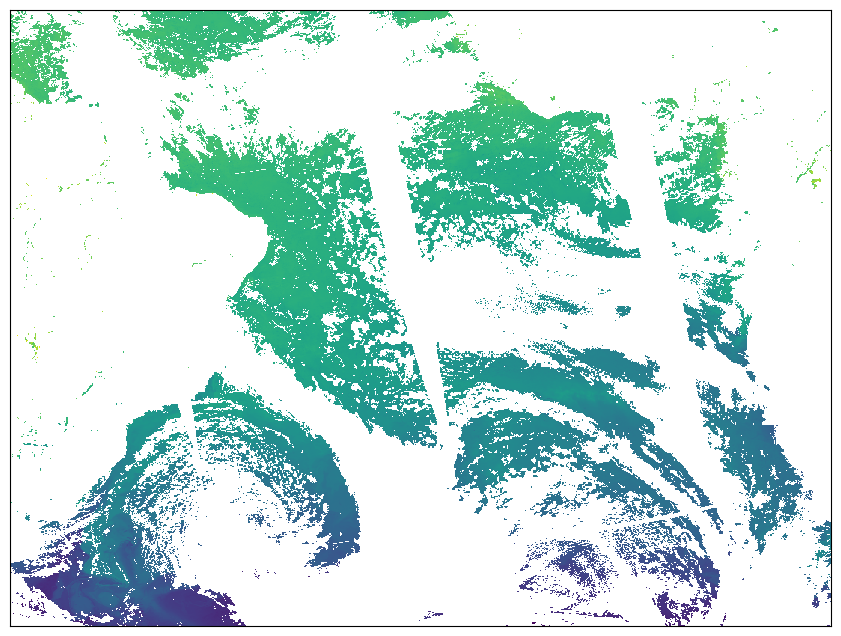

In [17]:
############################################################
# Passo 12: Cria uma figura com 19 x 8 Polegadas (in) de tamanho,
# e adiciona um eixo onde os elementos do plot serão adicionados.
############################################################

fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

############################################################
# Passo 13: Inicializa o mapa para plotar os dados com a biblioteca Basemap.
############################################################

map = Basemap(projection='cyl',# projection determina o tipo de projeção cartográfica
              lat_0=lat_0, lon_0=lon_0,
              llcrnrlon=minlon,# Os 4 parâmetros abaixo determinam os limites do plot
              llcrnrlat=minlat,
              urcrnrlon=maxlon,
              urcrnrlat=maxlat,
              resolution='i',# Determina a resolução dos contornos e continentes (h = high)
              )

############################################################
# Passo 15: Plota a TSM (Temperatura da Superfície do Mar)
# estimada a partir dos dados do sensor MODIS.
############################################################

map.pcolormesh(lons, lats, tsm, shading='auto')

[-60. -55. -50. -45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.
  10.  15.  20.]


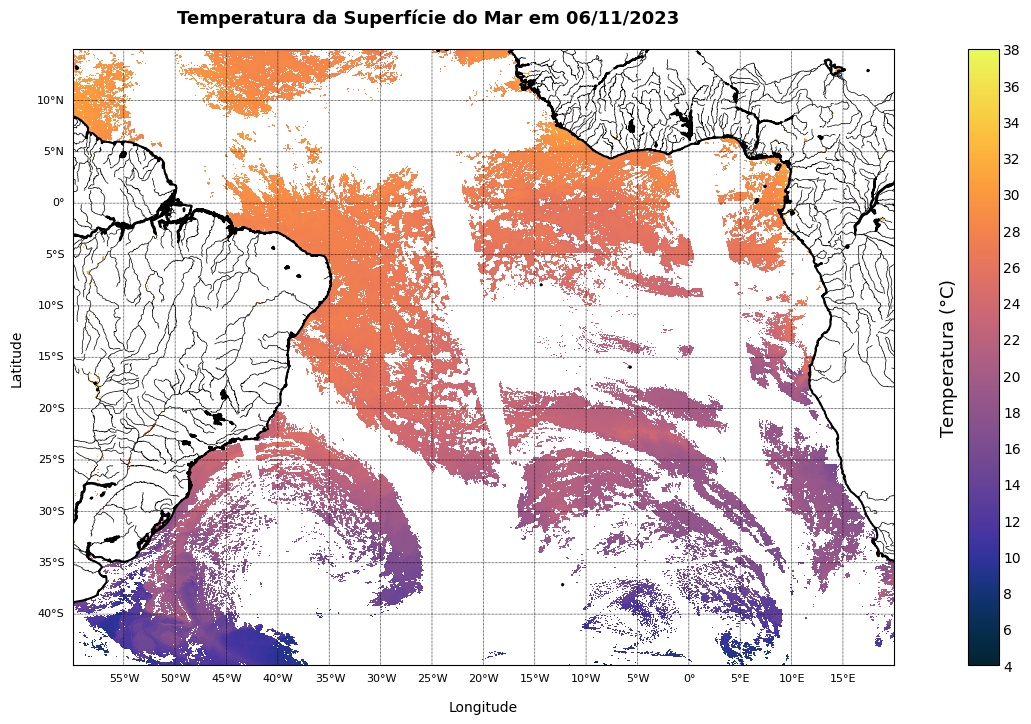

In [19]:
############################################################
# Passo 12: Cria uma figura com 19 x 8 Polegadas (in) de tamanho,
# e adiciona um eixo onde os elementos do plot serão adicionados.
############################################################

fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

############################################################
# Passo 13: Inicializa o mapa para plotar os dados com a biblioteca Basemap.
############################################################

map = Basemap(projection='cyl',# projection determina o tipo de projeção cartográfica
              lat_0=lat_0, lon_0=lon_0,
              llcrnrlon=minlon,# Os 4 parâmetros abaixo determinam os limites do plot
              llcrnrlat=minlat,
              urcrnrlon=maxlon,
              urcrnrlat=maxlat,
              resolution='i',# Determina a resolução dos contornos e continentes (h = high)
              )

############################################################
# Passo 15: Plota a TSM (Temperatura da Superfície do Mar)
# estimada a partir dos dados do sensor MODIS.
############################################################

sc = map.pcolormesh(lons, lats, tsm, cmap=cmocean.cm.thermal, vmin=4, vmax=38, shading='auto')

############################################################
# Passo 14: Desenha as feições no mapa (linha de costa, oceano).
############################################################

# Desenha a linha de costa
map.drawcoastlines(linewidth=1.5)
# Desenha rios continentais
map.drawrivers()

############################################################
# Passo 16: Desenha os paralelos e meridianos no mapa.
############################################################

meridians = np.arange(minlon, maxlon + 2., 5.)
parallels = np.arange(minlat, maxlat + 2., 5.)

meridians = np.round(meridians, decimals=1) # np.round serve para arredondar em X casas decimais
parallels = np.round(parallels, decimals=1) # np.round serve para arredondar em X casas decimais

# Labels = [esquerda, direito, topo, base], True para plotar
map.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5, fontsize=8)
map.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5, fontsize=8)

############################################################
# Passo 17: Insere os labels (rótulos) para a latitude e longitude.
############################################################

# O labelpad = configura o espaçamento entre o título do eixo e o eixo
plt.ylabel('Latitude', labelpad=35)
plt.xlabel('Longitude', labelpad=25)

############################################################
# Passo 19: Configura os valores máximos e mínimos do colormap
# (barra de cores com os valores da TSM)
############################################################
plt.clim(int(4), int(38))

############################################################
# Passo 20: Configura o título da figura
############################################################

plt.suptitle(f'Temperatura da Superfície do Mar em {data}', fontsize=13, fontweight='bold', y=0.93)

############################################################
# Passo 21: Cria uma lista de valores de TSM para a colorbar,
# insere a colorbar na figura e configura a legenda.
############################################################

# Cria uma lista de valores para a colorbar, de 0 a 38 com intervalos de 2 graus Celsius
ticks_lbs = list(range(4, 40, 2))
# Insere a colorbar
cbar = plt.colorbar(sc, ticks=ticks_lbs, orientation='vertical')
cbar.ax.tick_params(size=0)
# Configura a legenda da colorbar (set_ylabel quando a barra for vertical, set_xlabel quando a barra for horizontal)
cbar.ax.set_ylabel(r'Temperatura ($\degree$C)', fontsize=13, labelpad=-60)

############################################################
# Passo 22: Salvar a imagem de TSM gerada por este código em formato de figura
# na mesma pasta do Google Drive onde está a rotina.
############################################################

# Salva a figura como um arquivo .png
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Eollab/Aulas/Aula 02/tsm_modis_aqua_diaria_06_11_23.png', dpi=150, bbox_inches='tight', pad_inches=0.2);

## <strong>Atividade Prática</strong>
<hr>